<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Ejercicios_simulaci%C3%B3n_SyS_nov_16/Punto_4y5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio**

4. Fije los valores de los párametros del sistema rlc paralelo, con condiciones iniciales cero, para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón.

5.  Para cada caso del punto 5, gráfique el diagrama de polos y ceros, diagrama de bode, respuesta impulso, respuesta escalón y respuesta a rampa (ver cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/EjemploSLIT2OrdenCanonicoLaplace.ipynb).


#**Simulación**

#**Circuito RLC paralelo**



*   Salida ante una entrada escalón





In [113]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, = sym.symbols('t R L C ', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction(1,(L*C)*s**2 + (L*s)/R + 1,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

         1          
────────────────────
  ⎛     2   L⋅s    ⎞
s⋅⎜C⋅L⋅s  + ─── + 1⎟
  ⎝          R     ⎠

para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón. Necesitamos encontrar la forma canónica SLIT de segundo orden




In [114]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

    L⋅(C⋅R⋅s + 1)      1
- ────────────────── + ─
         2             s
  C⋅L⋅R⋅s  + L⋅s + R    


*   Respuesta subamortiguada

  0 < $\xi$ <1



In [115]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 100, L: 0.1, C: 0.01}#valores utilizados para la simulación
Ye = Yp.subs(RLC1)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

                        -0.5⋅t                            -0.5⋅t              
1 - 0.0158133650950361⋅ℯ      ⋅sin(31.6188235075248⋅t) - ℯ      ⋅cos(31.618823

          
5075248⋅t)

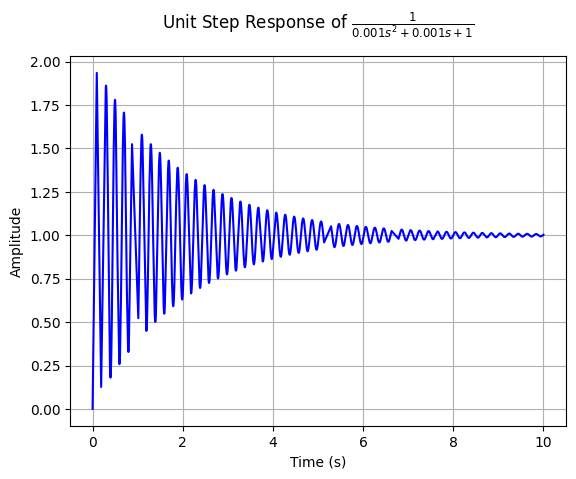

In [116]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)

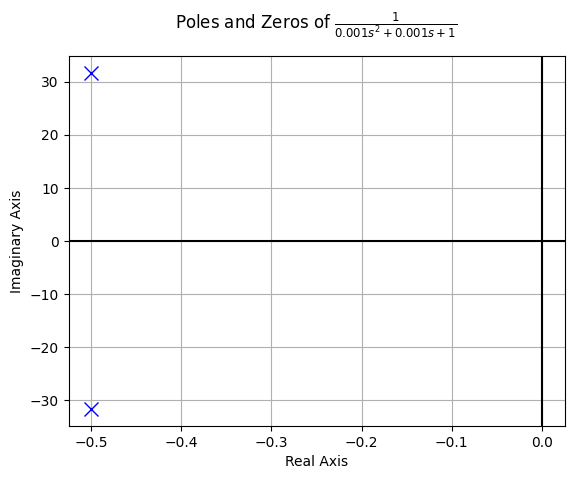

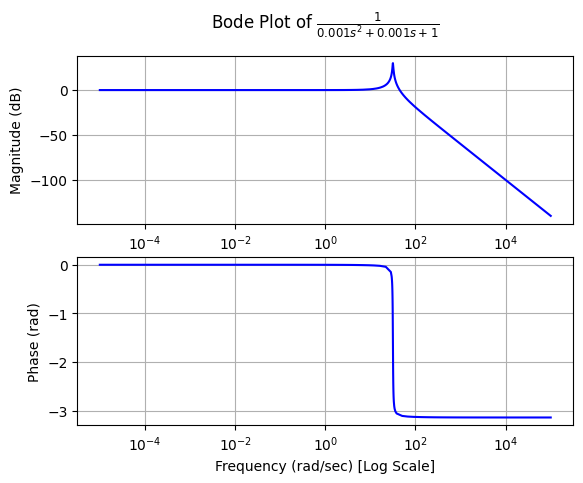

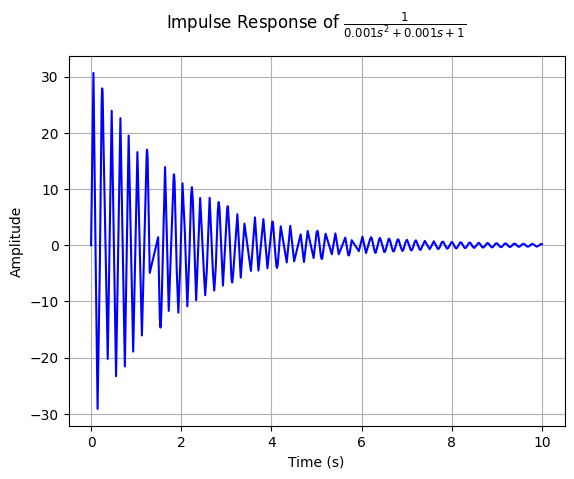

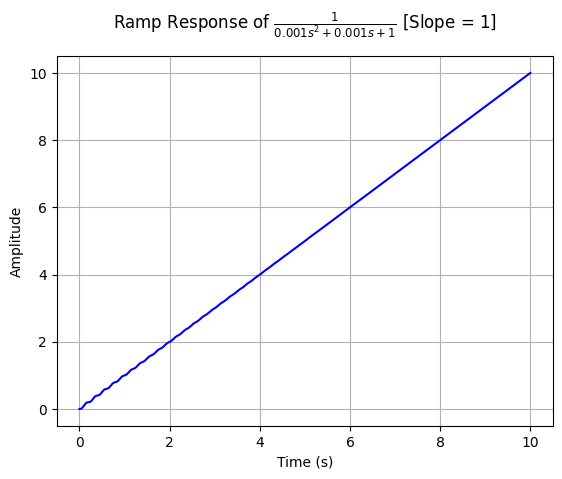

In [118]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)



*  Respuesta sobreamortiguada

 $\xi$ >1



In [119]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 10}#valores utilizados para la simulación
Ye = Yp.subs(RLC2)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -t                              
         ───                             
          20    ⎛√39⋅t⎞    -t            
    √39⋅ℯ   ⋅sin⎜─────⎟    ───           
                ⎝  20 ⎠     20    ⎛√39⋅t⎞
1 - ─────────────────── - ℯ   ⋅cos⎜─────⎟
             39                   ⎝  20 ⎠

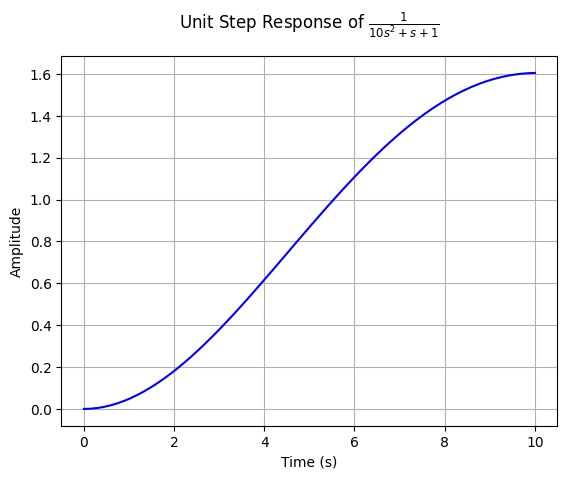

In [120]:

HRLC=control.TransferFunction(H.num,H.den.subs(RLC2),s)
control.step_response_plot(HRLC)

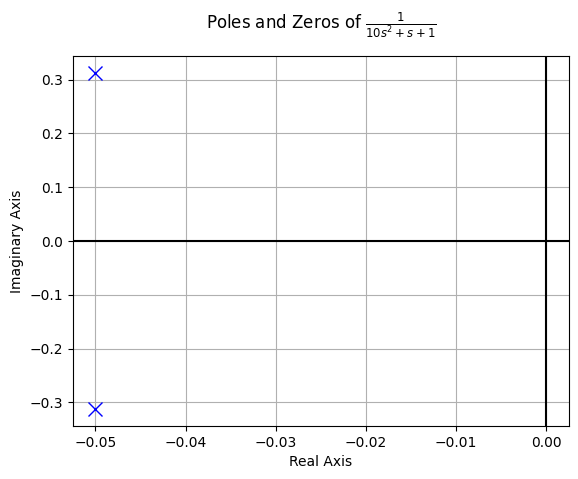

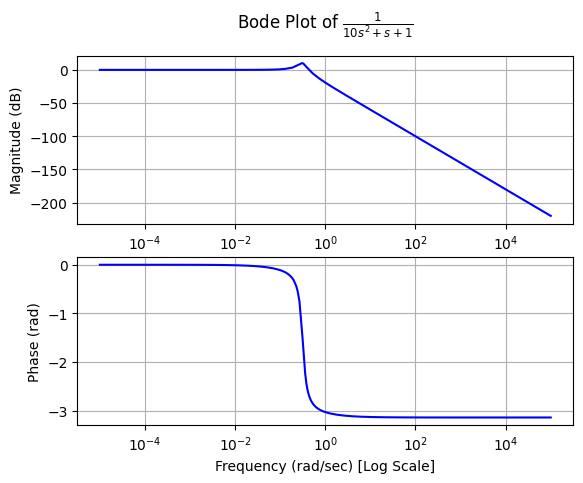

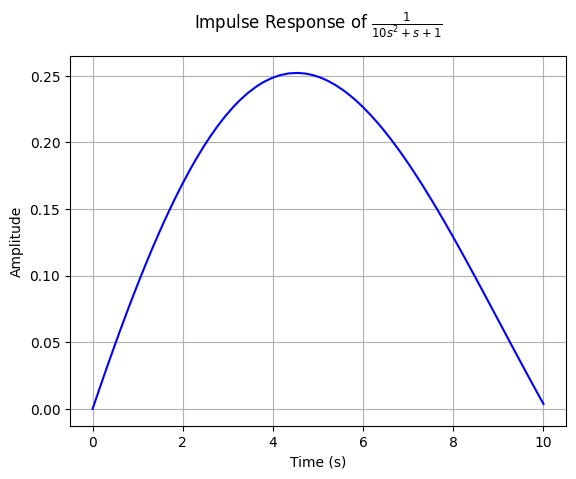

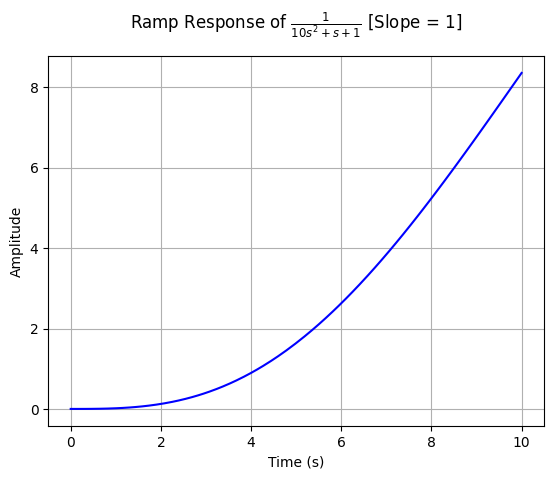

In [121]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)




*  Respuesta de amortiguamiento crítico

 $\xi$ = 1




In [122]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 4}#valores utilizados para la simulación
Ye = Yp.subs(RLC3)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -t                              
         ───                             
          8     ⎛√15⋅t⎞    -t            
    √15⋅ℯ   ⋅sin⎜─────⎟    ───           
                ⎝  8  ⎠     8     ⎛√15⋅t⎞
1 - ─────────────────── - ℯ   ⋅cos⎜─────⎟
             15                   ⎝  8  ⎠

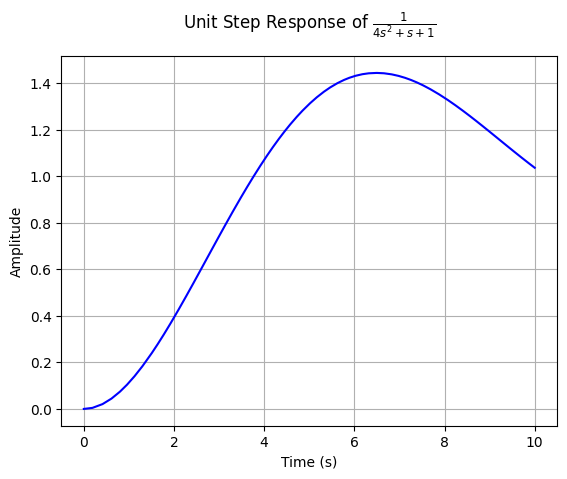

In [123]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)

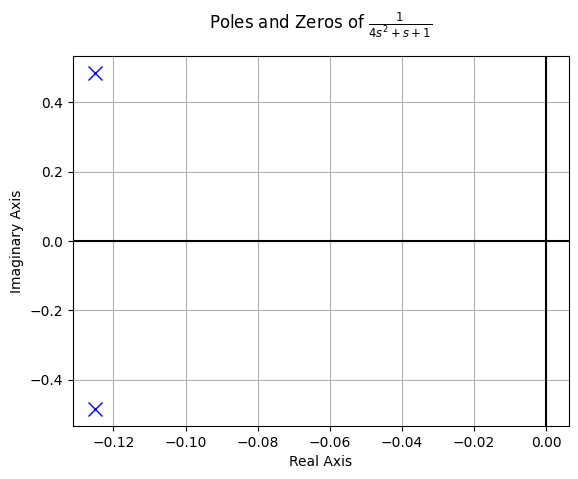

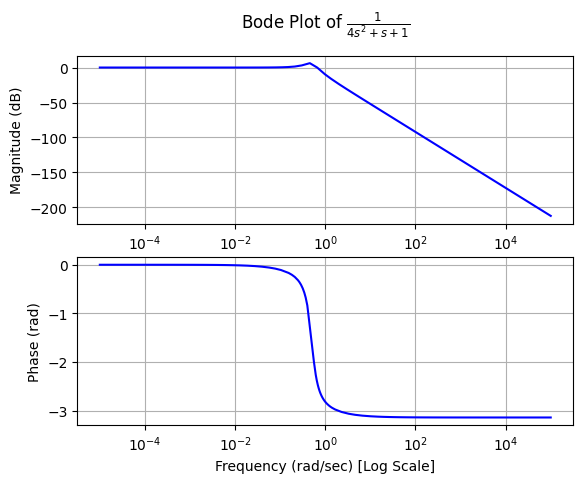

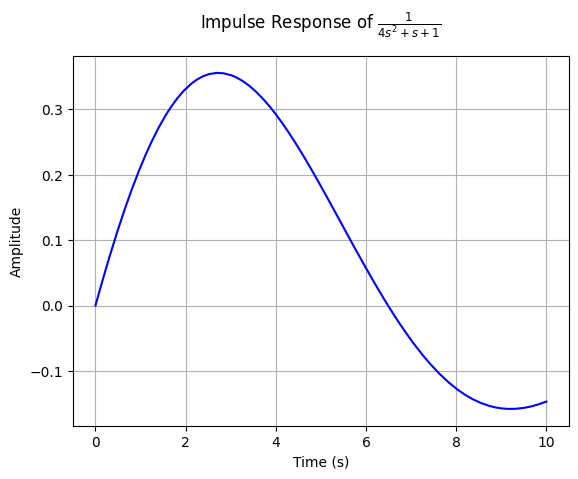

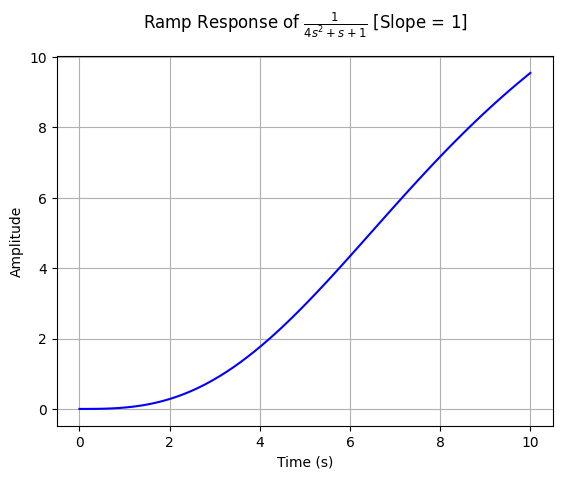

In [124]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)




*   Respuesta inestable

$\xi$ < 0




In [125]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: -1, L: 1, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

    t                             
    ─                             
    2    ⎛√3⋅t⎞    t              
√3⋅ℯ ⋅sin⎜────⎟    ─              
         ⎝ 2  ⎠    2    ⎛√3⋅t⎞    
─────────────── - ℯ ⋅cos⎜────⎟ + 1
       3                ⎝ 2  ⎠    

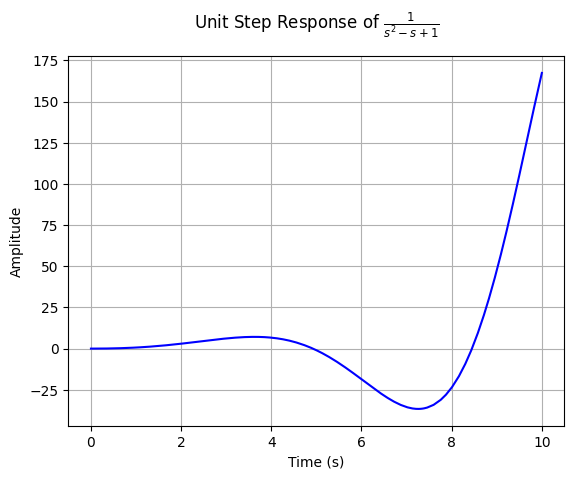

In [126]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)

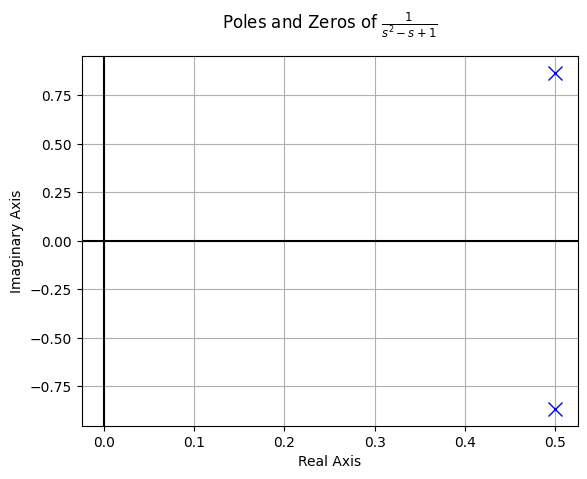

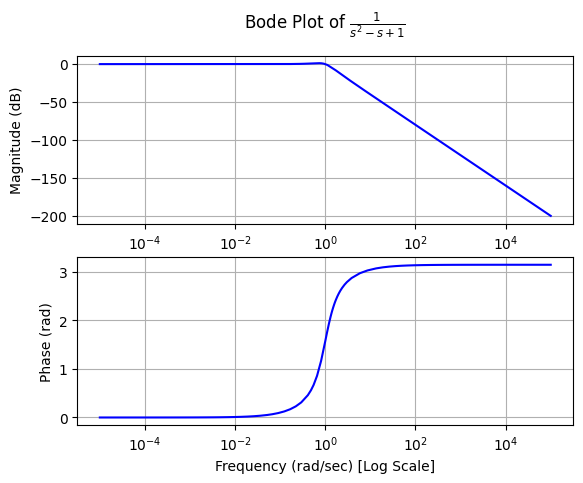

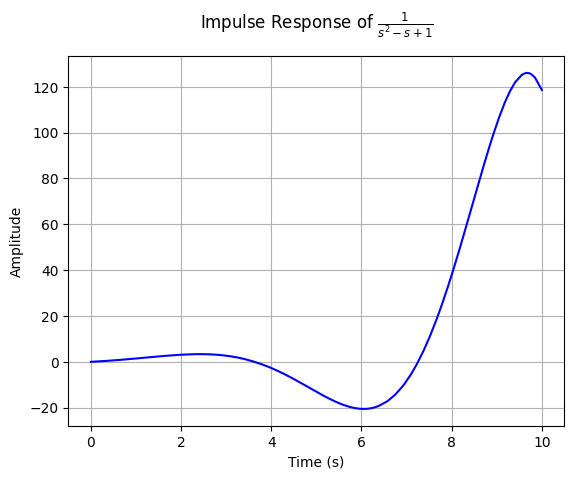

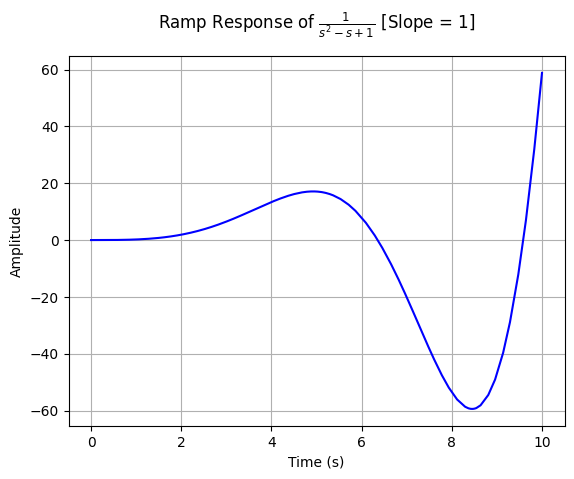

In [127]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)


*   Respuesta oscilatoria

$\xi$ = 0

In [128]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 3, L: 0, C: 0.14}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

0

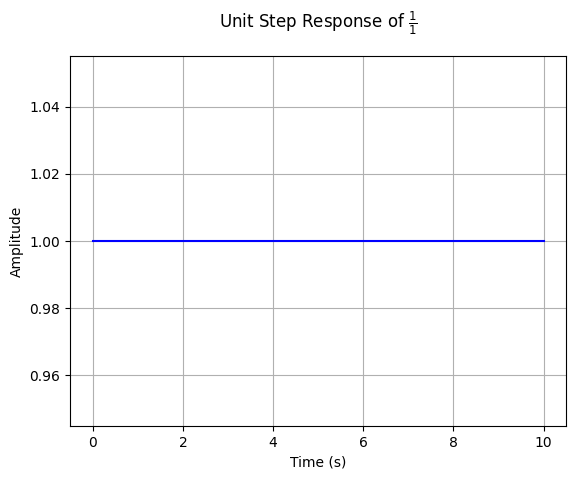

In [129]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)

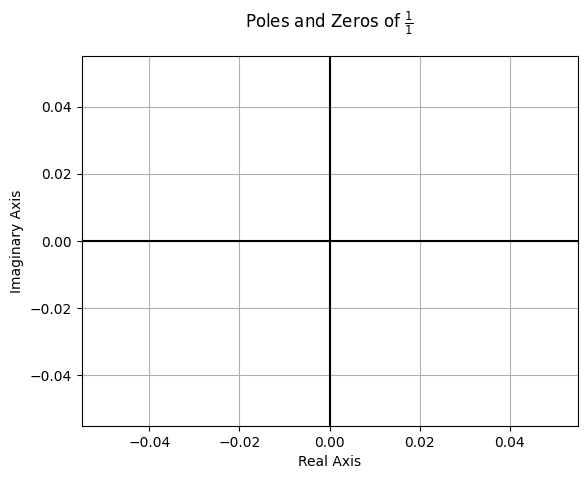

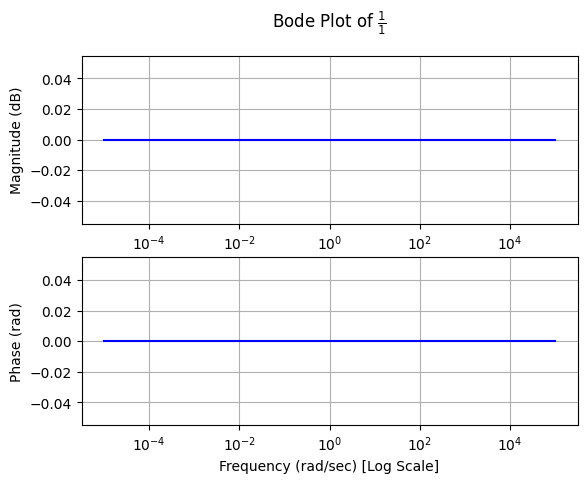

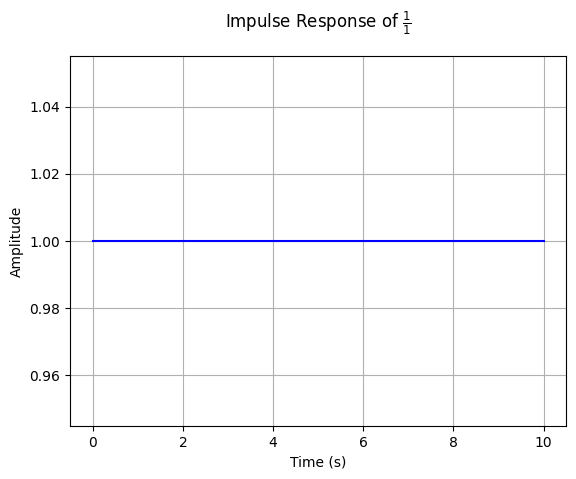

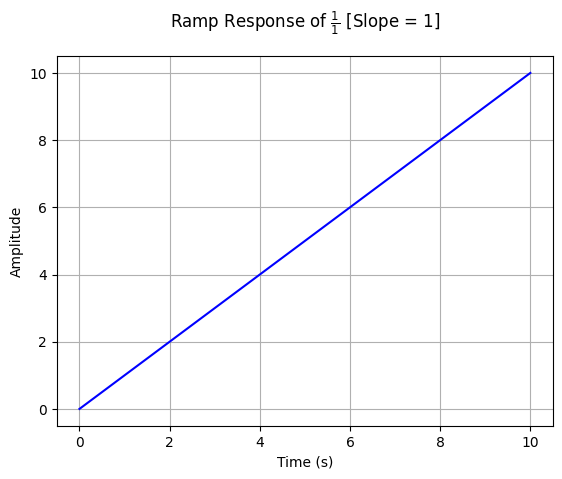

In [130]:
# Además, se gráfica el diagrama de polos y ceros, diagrama de bode, respuesta impulso y respuesta a rampa
control.pole_zero_plot(HRLC)
control.bode_plot(HRLC)
control.impulse_response_plot(HRLC)
control.ramp_response_plot(HRLC)